In [2]:
# !pip install seaborn

     -------------------------------------- 293.3/293.3 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 7.6/7.6 MB 25.7 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [2]:
br_pd = pd.read_csv('./data/br.csv')
viscode_pd = pd.read_csv('./data/viscode.csv')
score_pd = pd.read_csv('./data/score.csv')
srl_s_pd = pd.read_csv('./data/srl_strategy.csv')
srl_m_pd = pd.read_csv('./data/srl_motivation.csv')
sill_pd = pd.read_csv('./data/sill.csv')

# Data Characteristics

## score

In [3]:
score_pd.nunique()

userid    516
score      75
class      10
dtype: int64

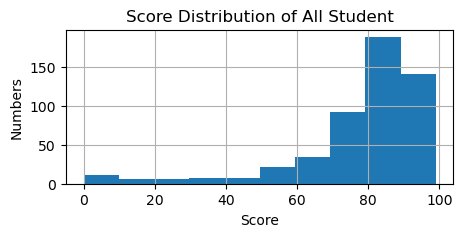

In [4]:
plt.figure(figsize=(5, 2))
score_pd['score'].hist(bins=10)
plt.title('Score Distribution of All Student')
plt.ylabel('Numbers')
plt.xlabel('Score')
plt.savefig('./data_plot/score')
plt.show()

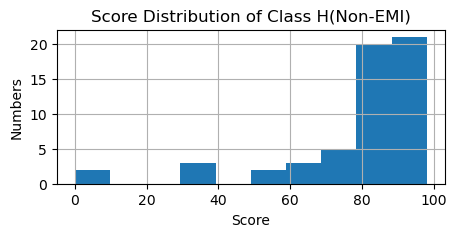

In [5]:
plt.figure(figsize=(5, 2))
score_pd[score_pd['class']=='h']['score'].hist(bins=10)

plt.title('Score Distribution of Class H(Non-EMI)')
plt.ylabel('Numbers')
plt.xlabel('Score')
plt.show()

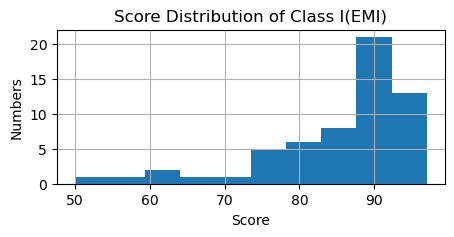

In [6]:
plt.figure(figsize=(5, 2))
score_pd[score_pd['class']=='i']['score'].hist(bins=10)

plt.title('Score Distribution of Class I(EMI)')
plt.ylabel('Numbers')
plt.xlabel('Score')
plt.show()

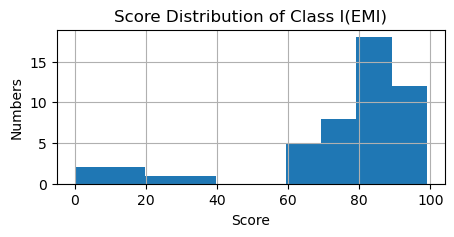

In [7]:
plt.figure(figsize=(5, 2))
score_pd[score_pd['class']=='j']['score'].hist(bins=10)

plt.title('Score Distribution of Class I(EMI)')
plt.ylabel('Numbers')
plt.xlabel('Score')
plt.show()

a


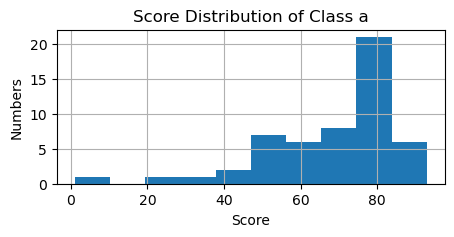

b


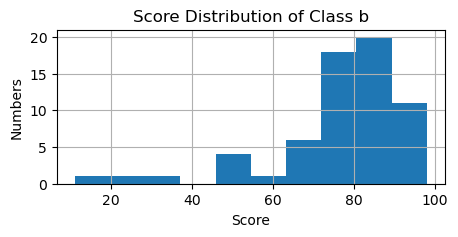

c


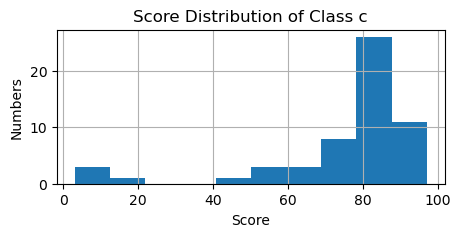

d


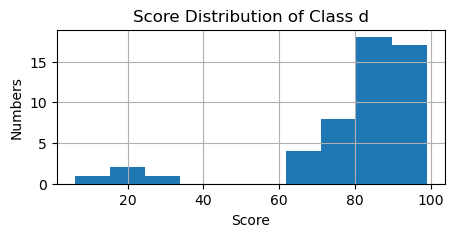

e


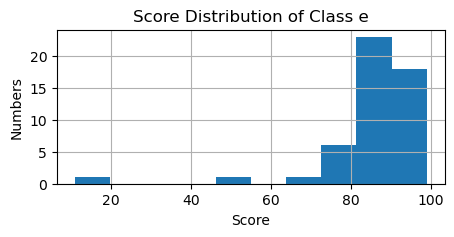

f


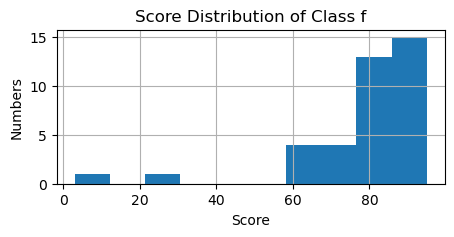

g


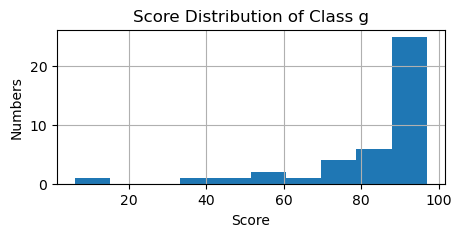

h


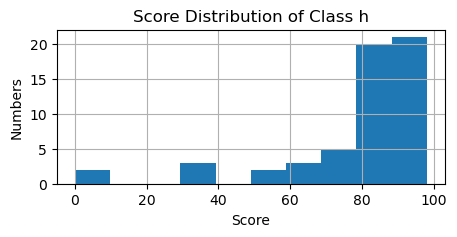

i


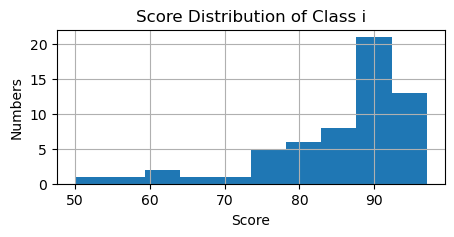

j


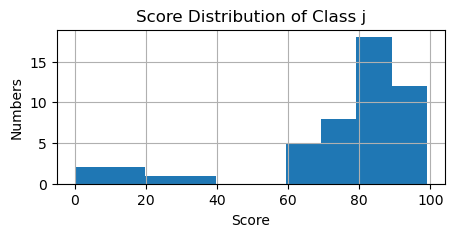

In [8]:
def Plot_Score():
    classID = 'abcdefghij'
    for cid in classID :
        print(cid)
        plt.figure(figsize=(5, 2))
        score_pd[score_pd['class']==cid]['score'].hist(bins=10)

        plt.title('Score Distribution of Class ' + cid )
        plt.ylabel('Numbers')
        plt.xlabel('Score')
        save_path = './data_plot/score_'+cid
        plt.savefig(save_path)
        plt.show()
Plot_Score()


In [9]:
score_pd

,userid,score,class
0,faceedc2fdf78a0f24b2e469c8072881,68,a
1,3017f8db51adce97836bfbd2a5e76bc4,29,a
2,fcd714c799381d83a55d85fc8813aaf2,44,a
3,822f678c2e95794c527b1f854bd35006,74,a
4,52a83b516a01c8cefdb16bd3acb4b844,76,a
...,...,...,...
511,86db2f650c5d356f317d7a8e14ea890b,87,j
512,a7f0e9163cb183d8fe0d203022fdfb2d,99,j
513,587675e22e21054ac8ce7812b8e9c247,95,j
514,2bed623b9093052e17c4b19616485f8d,17,j


# Data Statistics

# SILL

In [10]:
sill_pd = pd.read_csv('./data/sill.csv')
sill_pd

,userid,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,...,s_39,s_40,s_41,s_42,s_43,s_44,s_45,s_46,s_47,s_48
0,b1dfc5c6ec04d46d1823c5fa972ad320,5,5,5,5,1,1,5,1,5,...,5,1,1,5,5,5,1,1,1,5
1,4e3519d7eafbfccdae231756fcf2ce9c,3,3,3,3,3,3,3,3,3,...,4,4,3,4,4,4,3,3,4,3
2,0cebfa477ed3e2e0c5a3f9aa96c23698,5,5,5,4,5,5,5,5,5,...,5,5,4,5,5,4,3,5,5,4
3,379bbc4c2c728db0a249e8c4e6b621af,3,3,3,3,3,3,5,3,5,...,5,1,4,5,5,5,5,5,5,5
4,a92f1708363527a34d93b0bc7840262c,3,4,3,3,2,2,4,4,3,...,4,3,3,3,4,3,2,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,4a13d3b764c5ff4abaa0a856b4744306,3,3,3,4,4,4,3,4,4,...,2,2,1,4,3,3,4,4,4,3
257,6602564721782251ce89742ca4051a35,3,3,3,3,1,3,1,3,3,...,3,3,3,3,3,3,3,3,3,3
258,2bed623b9093052e17c4b19616485f8d,2,2,2,2,3,2,2,2,2,...,3,3,1,1,3,3,1,2,3,2
259,05befdd4658ac20a97d8e1c1c747ed28,3,2,3,3,2,3,1,3,2,...,3,3,3,3,3,3,3,3,2,4


In [11]:
# Calculate Standard Deviation & Delete the data which sd=0 
question_list = sill_pd.columns[1:49]
sill_pd['sd'] = sill_pd[question_list].std(axis=1)
keep_list = sill_pd['sd'] > 0
sill_pd = sill_pd[keep_list]

'''
    Merge by Category 
    ---------------------------
    category      : Question number
    ---------------------------
    memory        : 1-8 (8)
    cognitive     : 9-21 (13)
    compensation  : 22-27 (6)
    metacognitive : 28-36 (9)
    affective     : 37-42 (6)
    social        : 43-48 (6)
'''

memory_list = sill_pd.columns[1:9]
cognitive_list = sill_pd.columns[9:22]
compensation_list = sill_pd.columns[22:28]
metacognitive_list = sill_pd.columns[28:37]
affective_list = sill_pd.columns[37:43]
social_list = sill_pd.columns[43:49]

sill_pd['memory'] = sill_pd[memory_list].sum(axis=1)/8
sill_pd['cognitive'] = sill_pd[cognitive_list].sum(axis=1)/13
sill_pd['compensation'] = sill_pd[compensation_list].sum(axis=1)/6
sill_pd['metacognitive'] = sill_pd[metacognitive_list].sum(axis=1)/9
sill_pd['affective'] = sill_pd[affective_list].sum(axis=1)/6
sill_pd['social'] = sill_pd[social_list].sum(axis=1)/6

# keep data with same category
keep_list = ['userid', 'memory', 'cognitive', 'compensation', 'metacognitive', 'affective', 'social']
sill_pd = sill_pd[keep_list]
sill_pd = sill_pd.reset_index()
sill_pd = sill_pd.drop('index', axis=1)
sill_pd

/tmp/ipykernel_11322/1379482121.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sill_pd['memory'] = sill_pd[memory_list].sum(axis=1)/8
/tmp/ipykernel_11322/1379482121.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sill_pd['cognitive'] = sill_pd[cognitive_list].sum(axis=1)/13
/tmp/ipykernel_11322/1379482121.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,userid,memory,cognitive,compensation,metacognitive,affective,social
0,b1dfc5c6ec04d46d1823c5fa972ad320,3.500,4.307692,3.333333,5.000000,3.500000,3.000000
1,4e3519d7eafbfccdae231756fcf2ce9c,3.000,3.000000,2.833333,3.000000,3.833333,3.500000
2,0cebfa477ed3e2e0c5a3f9aa96c23698,4.875,4.846154,4.500000,4.888889,4.500000,4.333333
3,379bbc4c2c728db0a249e8c4e6b621af,3.250,5.000000,4.666667,4.666667,3.833333,5.000000
4,a92f1708363527a34d93b0bc7840262c,3.125,3.538462,3.833333,3.888889,3.500000,2.833333
...,...,...,...,...,...,...,...
251,4a13d3b764c5ff4abaa0a856b4744306,3.500,4.000000,4.000000,4.000000,2.666667,3.500000
252,6602564721782251ce89742ca4051a35,2.500,2.846154,2.833333,3.555556,3.000000,3.000000
253,2bed623b9093052e17c4b19616485f8d,2.125,2.461538,2.833333,2.444444,2.000000,2.333333
254,05befdd4658ac20a97d8e1c1c747ed28,2.500,2.307692,2.333333,3.111111,3.000000,3.000000


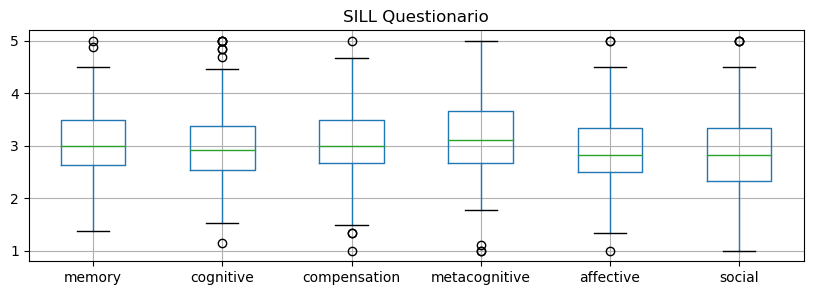

In [12]:
data = sill_pd.drop('userid', axis=1)
plt.figure(figsize=(10, 3))
data.boxplot()
plt.title('SILL Questionario')
plt.savefig('./data_plot/sill')
plt.show()

In [13]:
merged_pd = pd.merge(sill_pd, score_pd, on='userid', how='outer')

In [14]:
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_11322/452242710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,memory,cognitive,compensation,metacognitive,affective,social,score
memory,1.000000,0.697171,0.536199,0.628012,0.568575,0.473896,-0.065048
cognitive,0.697171,1.000000,0.731037,0.754880,0.553798,0.668640,-0.059780
compensation,0.536199,0.731037,1.000000,0.630732,0.470282,0.637990,-0.038014
metacognitive,0.628012,0.754880,0.630732,1.000000,0.730152,0.622998,-0.104065
affective,0.568575,0.553798,0.470282,0.730152,1.000000,0.464236,-0.112113
social,0.473896,0.668640,0.637990,0.622998,0.464236,1.000000,-0.106723
score,-0.065048,-0.059780,-0.038014,-0.104065,-0.112113,-0.106723,1.000000


In [15]:
corr = merged_pd.corr()
corr

/tmp/ipykernel_11322/1909979388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,memory,cognitive,compensation,metacognitive,affective,social,score
memory,1.000000,0.697171,0.536199,0.628012,0.568575,0.473896,-0.065048
cognitive,0.697171,1.000000,0.731037,0.754880,0.553798,0.668640,-0.059780
compensation,0.536199,0.731037,1.000000,0.630732,0.470282,0.637990,-0.038014
metacognitive,0.628012,0.754880,0.630732,1.000000,0.730152,0.622998,-0.104065
affective,0.568575,0.553798,0.470282,0.730152,1.000000,0.464236,-0.112113
social,0.473896,0.668640,0.637990,0.622998,0.464236,1.000000,-0.106723
score,-0.065048,-0.059780,-0.038014,-0.104065,-0.112113,-0.106723,1.000000


<Axes: >

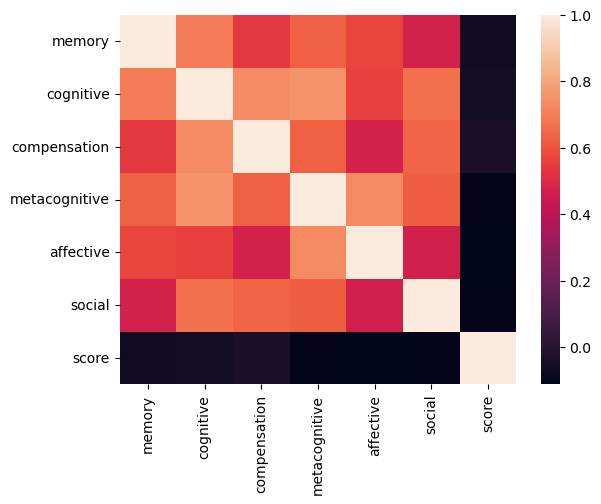

In [16]:
sns.heatmap(corr)

# SRL Motivation

In [17]:
srl_motivate_pd = pd.read_csv('./data/srl_motivation.csv')

In [18]:
# Calculate Standard Deviation & Delete the data which sd=0
question_list = srl_motivate_pd.columns[1:32]
srl_motivate_pd['sd'] = srl_motivate_pd[question_list].std(axis=1)
keep_list = srl_motivate_pd['sd'] > 0
srl_motivate_pd = srl_motivate_pd[keep_list]
srl_motivate_pd

'''
    Merge by Category 
    ---------------------------
    category      : Question number
    ---------------------------
    intrinsic       : 1-4 (4)
    extrinsic       : 5-8 (4)
    task_value      : 9-14 (6)
    control_beliefs : 15-18 (4)
    self_efficacy   : 19-26 (8)
    test_anxiety    : 27-31 (5)
'''

# classify data with same category
i = 1
intrinsic_goal_orientation = srl_motivate_pd.columns[i:i+4]
i = i + 4
extrinsic_goal_orientation = srl_motivate_pd.columns[i:i+4]
i = i + 4
task_value = srl_motivate_pd.columns[i:i+6]
i = i + 6
control_beliefs = srl_motivate_pd.columns[i:i+4]
i = i + 4
self_efficacy_and_performance = srl_motivate_pd.columns[i:i+8]
i = i + 8
test_anxiety = srl_motivate_pd.columns[i:i+5]


srl_motivate_pd['intrinsic'] = srl_motivate_pd[intrinsic_goal_orientation].sum(axis=1)/4
srl_motivate_pd['extrinsic'] = srl_motivate_pd[extrinsic_goal_orientation].sum(axis=1)/4
srl_motivate_pd['task_value'] = srl_motivate_pd[task_value].sum(axis=1)/6
srl_motivate_pd['control_beliefs'] = srl_motivate_pd[control_beliefs].sum(axis=1)/4
srl_motivate_pd['self_efficacy'] = srl_motivate_pd[self_efficacy_and_performance].sum(axis=1)/8
srl_motivate_pd['test_anxiety'] = srl_motivate_pd[test_anxiety].sum(axis=1)/5

# keep data with same category
keep_list = ['userid', 'intrinsic', 'extrinsic', 'task_value', 'control_beliefs', 'self_efficacy', 'test_anxiety']
srl_motivate_pd = srl_motivate_pd[keep_list]
srl_motivate_pd = srl_motivate_pd.reset_index()
srl_motivate_pd = srl_motivate_pd.drop('index', axis=1)
srl_motivate_pd

,userid,intrinsic,extrinsic,task_value,control_beliefs,self_efficacy,test_anxiety
0,b84f9624c8d995c6b945afc898bd9973,3.75,1.50,4.166667,3.50,3.375,1.6
1,481c56986ebae62c870b0da9bbafc5c6,4.50,4.50,4.500000,4.50,4.500,4.6
2,0cebfa477ed3e2e0c5a3f9aa96c23698,5.00,4.50,5.000000,5.00,4.750,3.2
3,c054e8c731029ce6d73c784213513b09,4.25,5.00,4.000000,4.50,4.125,4.4
4,bebc49073c8a5def929612def946c281,3.25,3.50,3.833333,4.00,4.000,1.0
...,...,...,...,...,...,...,...
331,f43ce02534c7f8313708153cba867b96,3.75,2.25,4.833333,3.00,3.875,2.0
332,a9d74b3dd679c0d8e6489fc599f2dc3e,3.00,4.00,4.000000,4.25,4.125,3.8
333,f5095309462e250ecd736e7260a50fa7,4.00,3.25,4.500000,4.75,4.125,3.2
334,05befdd4658ac20a97d8e1c1c747ed28,4.50,4.00,4.166667,3.50,4.750,2.6


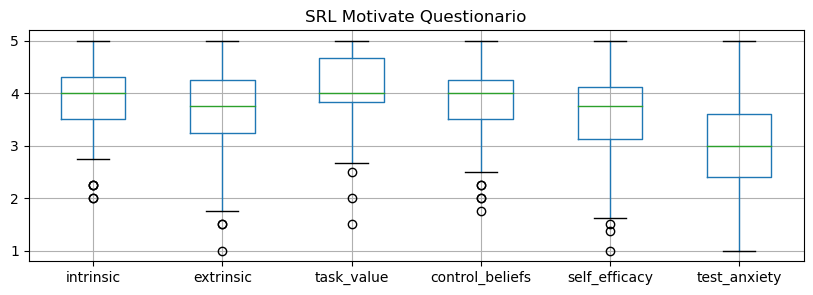

In [19]:
plt.figure(figsize=(10, 3))
srl_motivate_pd.boxplot()
plt.title('SRL Motivate Questionario')
plt.savefig('./data_plot/srl_motivation')
plt.show()

In [20]:
merged_pd = pd.merge(srl_motivate_pd, score_pd, on='userid', how='outer')

In [21]:
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_11322/452242710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,intrinsic,extrinsic,task_value,control_beliefs,self_efficacy,test_anxiety,score
intrinsic,1.000000,0.189445,0.608616,0.509061,0.560925,-0.171856,0.153372
extrinsic,0.189445,1.000000,0.276770,0.314587,0.378344,0.247056,0.156930
task_value,0.608616,0.276770,1.000000,0.556243,0.555539,-0.085141,0.216668
control_beliefs,0.509061,0.314587,0.556243,1.000000,0.568702,-0.100034,0.170430
self_efficacy,0.560925,0.378344,0.555539,0.568702,1.000000,-0.296116,0.315991
test_anxiety,-0.171856,0.247056,-0.085141,-0.100034,-0.296116,1.000000,-0.124181
score,0.153372,0.156930,0.216668,0.170430,0.315991,-0.124181,1.000000


In [22]:
corr = merged_pd.corr()
corr

/tmp/ipykernel_11322/1909979388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,intrinsic,extrinsic,task_value,control_beliefs,self_efficacy,test_anxiety,score
intrinsic,1.000000,0.189445,0.608616,0.509061,0.560925,-0.171856,0.153372
extrinsic,0.189445,1.000000,0.276770,0.314587,0.378344,0.247056,0.156930
task_value,0.608616,0.276770,1.000000,0.556243,0.555539,-0.085141,0.216668
control_beliefs,0.509061,0.314587,0.556243,1.000000,0.568702,-0.100034,0.170430
self_efficacy,0.560925,0.378344,0.555539,0.568702,1.000000,-0.296116,0.315991
test_anxiety,-0.171856,0.247056,-0.085141,-0.100034,-0.296116,1.000000,-0.124181
score,0.153372,0.156930,0.216668,0.170430,0.315991,-0.124181,1.000000


<Axes: >

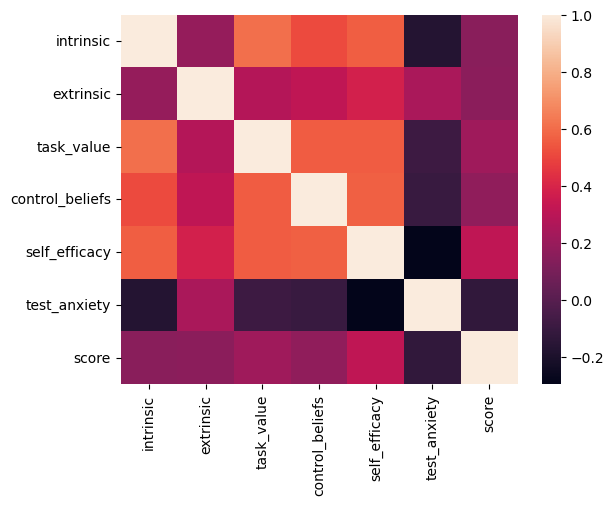

In [23]:
sns.heatmap(corr)

# SRL Strategy

In [24]:
srl_strategy_pd = pd.read_csv('./data/srl_strategy.csv')

In [25]:
# Calculate Standard Deviation & Delete the data which sd=0
question_list = srl_strategy_pd.columns[1:51]
srl_strategy_pd['sd'] = srl_strategy_pd[question_list].std(axis=1)
keep_list = srl_strategy_pd['sd'] > 0
srl_strategy_pd = srl_strategy_pd[keep_list]


'''
    Merge by Category 
    ---------------------------
    category      : Question number
    ---------------------------
    rehearsal         : 1-4    (4)
    elaboration       : 5-10   (6)
    organization      : 11-14  (4)
    critical_thinking : 15-19  (5)
    metacognitive_self_regulation   : 20-31 (12)
    time_environment  : 32-39  (8)
    effort_regulation : 40-43  (4)
    peer_learning     : 44-46  (3)
    help_seeking      : 47-50  (4)
'''

# classify data with same category
i = 1
rehearsal = srl_strategy_pd.columns[i:i+4]
i = i + 4
elaboration = srl_strategy_pd.columns[i:i+6]
i = i + 6
organization = srl_strategy_pd.columns[i:i+4]
i = i + 4
critical_thinking = srl_strategy_pd.columns[i:i+5]
i = i + 5
metacognitive_self_regulation = srl_strategy_pd.columns[i:i+12]
i = i + 12
time_environment = srl_strategy_pd.columns[i:i+8]
i = i + 8
effort_regulation = srl_strategy_pd.columns[i:i+4]
i = i + 4
peer_learning = srl_strategy_pd.columns[i:i+3]
i = i + 3
help_seeking = srl_strategy_pd.columns[i:i+4]


# avg
srl_strategy_pd['rehearsal'] = srl_strategy_pd[rehearsal].sum(axis=1) / 4
srl_strategy_pd['elaboration'] = srl_strategy_pd[elaboration].sum(axis=1) / 6
srl_strategy_pd['organization'] = srl_strategy_pd[organization].sum(axis=1) / 4
srl_strategy_pd['critical_thinking'] = srl_strategy_pd[critical_thinking].sum(axis=1)/ 5
srl_strategy_pd['metacognitive_self_regulation'] = srl_strategy_pd[metacognitive_self_regulation].sum(axis=1)/12
srl_strategy_pd['time_environment'] = srl_strategy_pd[time_environment].sum(axis=1)/8
srl_strategy_pd['effort_regulation'] = srl_strategy_pd[effort_regulation].sum(axis=1)/4
srl_strategy_pd['peer_learning'] = srl_strategy_pd[peer_learning].sum(axis=1)/3
srl_strategy_pd['help_seeking'] = srl_strategy_pd[help_seeking].sum(axis=1)/4

# keep data with same category
keep_list = ['userid', 'rehearsal', 'elaboration', 'organization', 'critical_thinking', 
             'metacognitive_self_regulation', 'time_environment', 'effort_regulation', 'peer_learning', 'help_seeking']
srl_strategy_pd = srl_strategy_pd[keep_list]
srl_strategy_pd = srl_strategy_pd.reset_index()
srl_strategy_pd = srl_strategy_pd.drop('index', axis=1)
srl_strategy_pd

,userid,rehearsal,elaboration,organization,critical_thinking,metacognitive_self_regulation,time_environment,effort_regulation,peer_learning,help_seeking
0,b64ce7758b9f7e58f1ad8bbcf7811e7d,4.75,4.666667,5.00,3.2,4.000000,3.375,3.00,4.000000,4.75
1,0cebfa477ed3e2e0c5a3f9aa96c23698,4.00,4.500000,4.50,4.0,4.000000,4.125,4.25,3.666667,4.00
2,0a715a568a054d7996fcbcbf17b36551,3.75,3.833333,3.75,3.8,4.000000,3.375,3.00,3.333333,3.25
3,ca7f48cb0d61ed7c967adf1a0010367e,4.75,3.166667,3.75,3.4,3.500000,3.250,3.75,2.333333,3.25
4,2979bd5d5a584c2aa70f4a434412bc2b,4.00,4.166667,4.00,3.8,3.083333,4.000,3.25,2.666667,3.50
...,...,...,...,...,...,...,...,...,...,...
333,b8ef6c606080652d058e67045887e847,4.25,4.333333,4.75,4.0,3.833333,3.500,3.25,3.333333,4.00
334,f5095309462e250ecd736e7260a50fa7,4.25,4.166667,4.75,3.6,3.833333,3.625,3.50,2.333333,4.25
335,b65e40d9bac3a1cec9291eadf905321c,3.50,3.333333,4.00,3.2,3.416667,3.500,4.00,3.333333,3.50
336,05befdd4658ac20a97d8e1c1c747ed28,3.25,3.666667,4.00,4.2,3.000000,3.250,3.75,4.000000,3.50


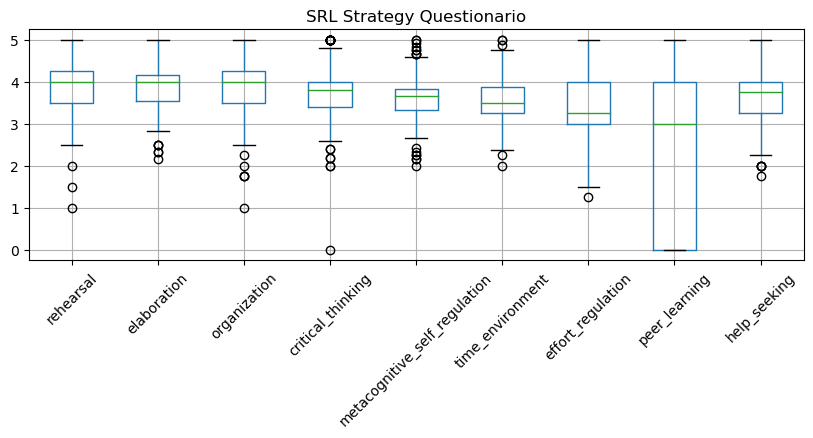

In [26]:
plt.figure(figsize=(10, 3))
srl_strategy_pd.boxplot()
plt.xticks(rotation=45)
plt.title('SRL Strategy Questionario')
results_path= './data_plot/srl_strategy'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')
plt.show()

In [27]:
merged_pd = pd.merge(srl_strategy_pd, score_pd, on='userid', how='outer')

In [28]:
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_11322/452242710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,rehearsal,elaboration,organization,critical_thinking,metacognitive_self_regulation,time_environment,effort_regulation,peer_learning,help_seeking,score
rehearsal,1.000000,0.589603,0.601229,0.334114,0.524337,0.400216,0.191882,0.095689,0.333172,0.083196
elaboration,0.589603,1.000000,0.530887,0.582468,0.603652,0.410001,0.226193,0.078465,0.327674,0.122428
organization,0.601229,0.530887,1.000000,0.314318,0.495442,0.377733,0.266131,0.183157,0.362197,0.054642
critical_thinking,0.334114,0.582468,0.314318,1.000000,0.494944,0.251895,0.082802,0.125176,0.245478,0.050071
metacognitive_self_regulation,0.524337,0.603652,0.495442,0.494944,1.000000,0.574729,0.409808,0.120002,0.403055,0.116909
time_environment,0.400216,0.410001,0.377733,0.251895,0.574729,1.000000,0.599953,-0.015862,0.245710,0.123223
effort_regulation,0.191882,0.226193,0.266131,0.082802,0.409808,0.599953,1.000000,-0.142876,0.099645,0.002993
peer_learning,0.095689,0.078465,0.183157,0.125176,0.120002,-0.015862,-0.142876,1.000000,0.224625,-0.073734
help_seeking,0.333172,0.327674,0.362197,0.245478,0.403055,0.245710,0.099645,0.224625,1.000000,0.104656
score,0.083196,0.122428,0.054642,0.050071,0.116909,0.123223,0.002993,-0.073734,0.104656,1.000000


In [29]:
corr = merged_pd.corr()
corr

/tmp/ipykernel_11322/1909979388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,rehearsal,elaboration,organization,critical_thinking,metacognitive_self_regulation,time_environment,effort_regulation,peer_learning,help_seeking,score
rehearsal,1.000000,0.589603,0.601229,0.334114,0.524337,0.400216,0.191882,0.095689,0.333172,0.083196
elaboration,0.589603,1.000000,0.530887,0.582468,0.603652,0.410001,0.226193,0.078465,0.327674,0.122428
organization,0.601229,0.530887,1.000000,0.314318,0.495442,0.377733,0.266131,0.183157,0.362197,0.054642
critical_thinking,0.334114,0.582468,0.314318,1.000000,0.494944,0.251895,0.082802,0.125176,0.245478,0.050071
metacognitive_self_regulation,0.524337,0.603652,0.495442,0.494944,1.000000,0.574729,0.409808,0.120002,0.403055,0.116909
time_environment,0.400216,0.410001,0.377733,0.251895,0.574729,1.000000,0.599953,-0.015862,0.245710,0.123223
effort_regulation,0.191882,0.226193,0.266131,0.082802,0.409808,0.599953,1.000000,-0.142876,0.099645,0.002993
peer_learning,0.095689,0.078465,0.183157,0.125176,0.120002,-0.015862,-0.142876,1.000000,0.224625,-0.073734
help_seeking,0.333172,0.327674,0.362197,0.245478,0.403055,0.245710,0.099645,0.224625,1.000000,0.104656
score,0.083196,0.122428,0.054642,0.050071,0.116909,0.123223,0.002993,-0.073734,0.104656,1.000000


<Axes: >

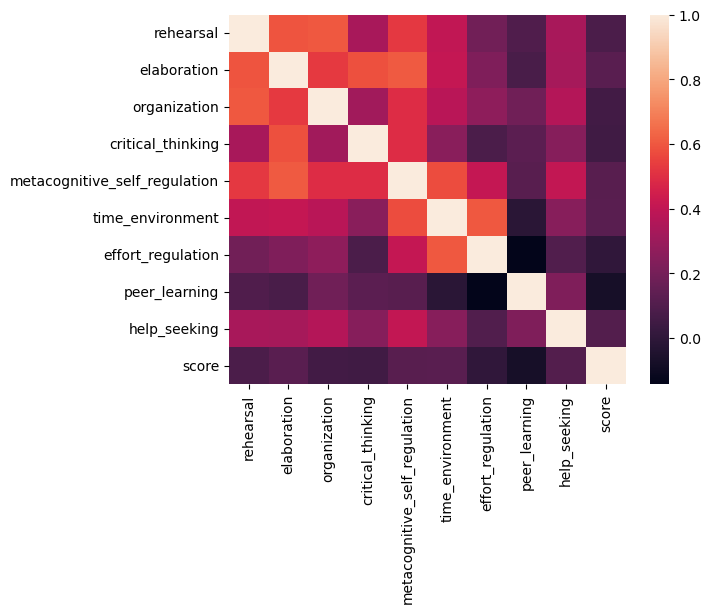

In [30]:
sns.heatmap(corr)

# Questionario & Score (correlation)

In [31]:
merged_pd = pd.merge( srl_motivate_pd, srl_strategy_pd, on='userid', how='outer')
merged_pd = pd.merge( merged_pd, sill_pd, on='userid', how='outer')
merged_pd = pd.merge( merged_pd, score_pd, on='userid', how='outer')
merged_pd

,userid,intrinsic,extrinsic,task_value,control_beliefs,self_efficacy,test_anxiety,rehearsal,elaboration,organization,...,peer_learning,help_seeking,memory,cognitive,compensation,metacognitive,affective,social,score,class
0,b84f9624c8d995c6b945afc898bd9973,3.75,1.5,4.166667,3.5,3.375,1.6,4.00,4.000000,3.0,...,5.000000,4.5,3.500,3.923077,3.833333,3.555556,3.833333,3.500000,81.0,b
1,481c56986ebae62c870b0da9bbafc5c6,4.50,4.5,4.500000,4.5,4.500,4.6,3.00,3.500000,3.5,...,4.000000,4.0,3.625,3.615385,4.166667,3.555556,3.166667,3.000000,84.0,b
2,0cebfa477ed3e2e0c5a3f9aa96c23698,5.00,4.5,5.000000,5.0,4.750,3.2,4.00,4.500000,4.5,...,3.666667,4.0,4.875,4.846154,4.500000,4.888889,4.500000,4.333333,98.0,b
3,c054e8c731029ce6d73c784213513b09,4.25,5.0,4.000000,4.5,4.125,4.4,5.00,4.333333,5.0,...,1.000000,5.0,2.125,1.923077,1.833333,2.666667,3.000000,1.333333,90.0,b
4,bebc49073c8a5def929612def946c281,3.25,3.5,3.833333,4.0,4.000,1.0,4.25,3.833333,4.0,...,3.000000,3.5,3.375,3.615385,4.333333,3.777778,3.500000,3.666667,85.0,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,88569fe0dd64fd9848b620b81337eb05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0,i
524,3994a1813ac1166b45d78c2320dc52fd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,j
525,e58e31bea053f0c9328ae3f2549c0794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,j
526,b5b9d493c3ec004d447d49622647c14b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,j


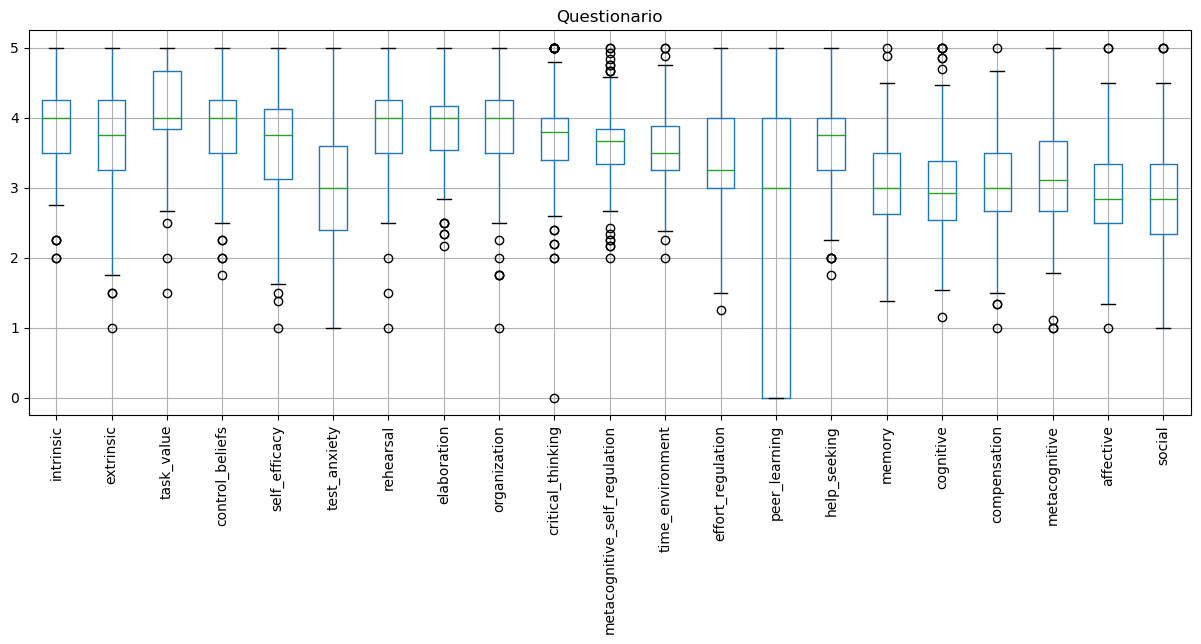

In [32]:
plt.figure(figsize=(15, 5))
merged_pd.drop('score', axis=1).boxplot()
plt.title('Questionario')
plt.xticks(rotation='vertical')
plt.savefig('./data_plot/all_questionario', dpi='figure', bbox_inches='tight')
plt.show()

In [33]:
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_11322/452242710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,intrinsic,extrinsic,task_value,control_beliefs,self_efficacy,test_anxiety,rehearsal,elaboration,organization,critical_thinking,metacognitive_self_regulation,time_environment,effort_regulation,peer_learning,help_seeking,memory,cognitive,compensation,metacognitive,affective,social,score
intrinsic,1.000000,0.188172,0.608227,0.509672,0.558827,-0.168482,0.363251,0.454310,0.233168,0.378458,0.340103,0.306970,0.139731,0.121002,0.189529,0.199478,0.202469,0.208706,0.212639,0.175536,0.073948,0.151139
extrinsic,0.188172,1.000000,0.277390,0.313189,0.378924,0.245109,0.275504,0.291622,0.350794,0.200035,0.362073,0.220949,0.161497,0.135874,0.306794,0.114380,0.128097,0.017478,0.169893,0.164152,0.205281,0.157451
task_value,0.608227,0.277390,1.000000,0.555244,0.553493,-0.082032,0.369119,0.521837,0.337690,0.326052,0.415606,0.353094,0.172414,0.140423,0.304660,0.194757,0.211561,0.230933,0.213193,0.196318,0.174259,0.214027
control_beliefs,0.509672,0.313189,0.555244,1.000000,0.567176,-0.097859,0.308934,0.395113,0.273160,0.262955,0.329063,0.256344,0.106517,0.166012,0.309894,0.082665,0.181697,0.131762,0.199903,0.163859,0.081882,0.168885
self_efficacy,0.558827,0.378924,0.553493,0.567176,1.000000,-0.297105,0.242182,0.484937,0.147372,0.467674,0.381350,0.280281,0.114936,0.118040,0.210794,0.114375,0.273559,0.313085,0.220935,0.162063,0.174504,0.316719
test_anxiety,-0.168482,0.245109,-0.082032,-0.097859,-0.297105,1.000000,-0.031305,-0.112497,0.085119,-0.129902,0.014411,0.005670,0.081730,0.003364,0.076048,0.014971,-0.098293,-0.136115,-0.005029,0.064737,0.034350,-0.126517
rehearsal,0.363251,0.275504,0.369119,0.308934,0.242182,-0.031305,1.000000,0.589603,0.601229,0.334114,0.524337,0.400216,0.191882,0.095689,0.333172,0.191891,0.210910,0.125766,0.180295,0.210680,0.097084,0.083196
elaboration,0.454310,0.291622,0.521837,0.395113,0.484937,-0.112497,0.589603,1.000000,0.530887,0.582468,0.603652,0.410001,0.226193,0.078465,0.327674,0.244470,0.292108,0.278423,0.197652,0.177493,0.186730,0.122428
organization,0.233168,0.350794,0.337690,0.273160,0.147372,0.085119,0.601229,0.530887,1.000000,0.314318,0.495442,0.377733,0.266131,0.183157,0.362197,0.176914,0.133003,0.109632,0.166320,0.154333,0.165474,0.054642
critical_thinking,0.378458,0.200035,0.326052,0.262955,0.467674,-0.129902,0.334114,0.582468,0.314318,1.000000,0.494944,0.251895,0.082802,0.125176,0.245478,0.283750,0.392272,0.380538,0.293787,0.254131,0.295176,0.050071


In [34]:
corr = merged_pd.corr()
corr

/tmp/ipykernel_11322/1909979388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,intrinsic,extrinsic,task_value,control_beliefs,self_efficacy,test_anxiety,rehearsal,elaboration,organization,critical_thinking,...,effort_regulation,peer_learning,help_seeking,memory,cognitive,compensation,metacognitive,affective,social,score
intrinsic,1.000000,0.188172,0.608227,0.509672,0.558827,-0.168482,0.363251,0.454310,0.233168,0.378458,...,0.139731,0.121002,0.189529,0.199478,0.202469,0.208706,0.212639,0.175536,0.073948,0.151139
extrinsic,0.188172,1.000000,0.277390,0.313189,0.378924,0.245109,0.275504,0.291622,0.350794,0.200035,...,0.161497,0.135874,0.306794,0.114380,0.128097,0.017478,0.169893,0.164152,0.205281,0.157451
task_value,0.608227,0.277390,1.000000,0.555244,0.553493,-0.082032,0.369119,0.521837,0.337690,0.326052,...,0.172414,0.140423,0.304660,0.194757,0.211561,0.230933,0.213193,0.196318,0.174259,0.214027
control_beliefs,0.509672,0.313189,0.555244,1.000000,0.567176,-0.097859,0.308934,0.395113,0.273160,0.262955,...,0.106517,0.166012,0.309894,0.082665,0.181697,0.131762,0.199903,0.163859,0.081882,0.168885
self_efficacy,0.558827,0.378924,0.553493,0.567176,1.000000,-0.297105,0.242182,0.484937,0.147372,0.467674,...,0.114936,0.118040,0.210794,0.114375,0.273559,0.313085,0.220935,0.162063,0.174504,0.316719
test_anxiety,-0.168482,0.245109,-0.082032,-0.097859,-0.297105,1.000000,-0.031305,-0.112497,0.085119,-0.129902,...,0.081730,0.003364,0.076048,0.014971,-0.098293,-0.136115,-0.005029,0.064737,0.034350,-0.126517
rehearsal,0.363251,0.275504,0.369119,0.308934,0.242182,-0.031305,1.000000,0.589603,0.601229,0.334114,...,0.191882,0.095689,0.333172,0.191891,0.210910,0.125766,0.180295,0.210680,0.097084,0.083196
elaboration,0.454310,0.291622,0.521837,0.395113,0.484937,-0.112497,0.589603,1.000000,0.530887,0.582468,...,0.226193,0.078465,0.327674,0.244470,0.292108,0.278423,0.197652,0.177493,0.186730,0.122428
organization,0.233168,0.350794,0.337690,0.273160,0.147372,0.085119,0.601229,0.530887,1.000000,0.314318,...,0.266131,0.183157,0.362197,0.176914,0.133003,0.109632,0.166320,0.154333,0.165474,0.054642
critical_thinking,0.378458,0.200035,0.326052,0.262955,0.467674,-0.129902,0.334114,0.582468,0.314318,1.000000,...,0.082802,0.125176,0.245478,0.283750,0.392272,0.380538,0.293787,0.254131,0.295176,0.050071


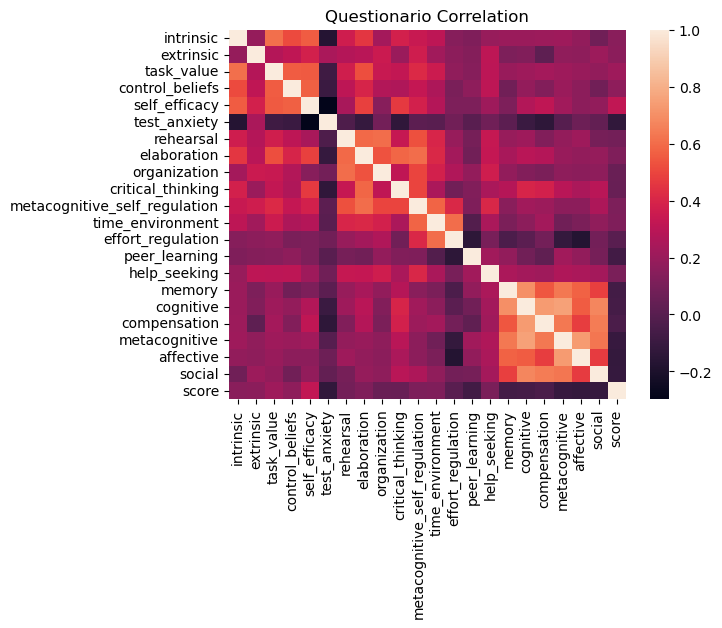

In [35]:
ax = plt.axes()
ax.set_title('Questionario Correlation')

sns_plot = sns.heatmap(corr)

results_path = './data_plot/Questionario_Correlation.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')

## viscode

In [36]:
viscode_pd = pd.read_csv('./data/viscode.csv')
#viscode_pd = viscode_pd.drop(['Unnamed: 0', 'userid', 'score', 'class' ], axis=1)

In [37]:
viscode_pd.nunique()

userid                     504
code_copy                  354
code_execution             427
code_paste                 390
code_speed                 476
notebook_open              273
tree_open                  117
AssertionError               2
AttributeError              41
AxisError                    2
ConversionError              3
DataError                    2
EmptyDataError               7
Exception                    3
FeatureNotFound              2
FileNotFoundError           13
HTTPError                    3
ImportError                  4
IndentationError            65
IndexError                  29
IndexingError                2
InvalidURL                   2
KeyError                    41
KeyboardInterrupt           24
ModuleNotFoundError         11
NameError                   76
OSError                      2
OverflowError                2
ParserError                 11
RecursionError              10
RuntimeError                 5
SelectorSyntaxError          2
Specific

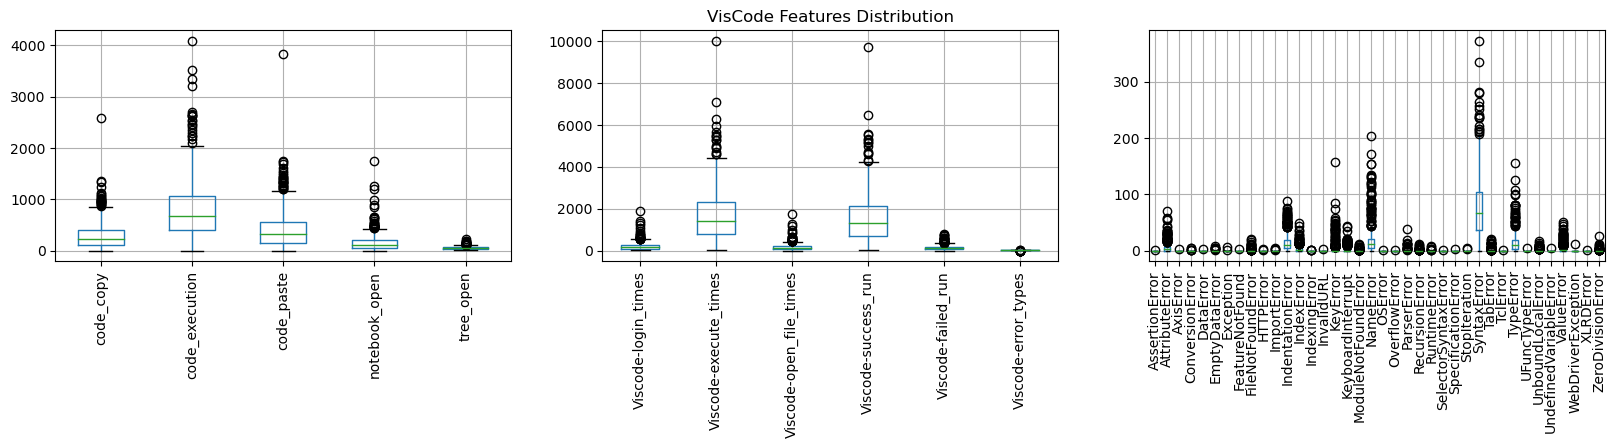

In [38]:
plt.figure(figsize=(20, 3))



plt.subplot(1, 3, 1)
viscode_pd[['code_copy', 'code_execution', 'code_paste', 'notebook_open', 'tree_open']].boxplot()

plt.xticks(rotation=90)


plt.subplot(1, 3, 2)
viscode_pd[['Viscode-login_times', 'Viscode-execute_times', 'Viscode-open_file_times', 'Viscode-success_run', 'Viscode-failed_run', 'Viscode-error_types', 'Viscode-spent_time']].boxplot()
plt.xticks(rotation=90)

plt.title('VisCode Features Distribution')

# plt.subplot(1, 3, 3)
# viscode_pd[['code_speed', 'codeLength' ]].boxplot()
# plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
viscode_pd.drop(['codeLength','code_copy', 'code_execution', 'code_paste', 'code_speed', 'notebook_open', 'tree_open', 'Viscode-login_times', 'Viscode-execute_times', 'Viscode-open_file_times', 'Viscode-success_run', 'Viscode-failed_run', 'Viscode-error_types', 'Viscode-spent_time'], axis=1).boxplot() # 
plt.xticks(rotation=90)




results_path = './data_plot/VisCode_Features_Distribution.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')
plt.show()

<Axes: >

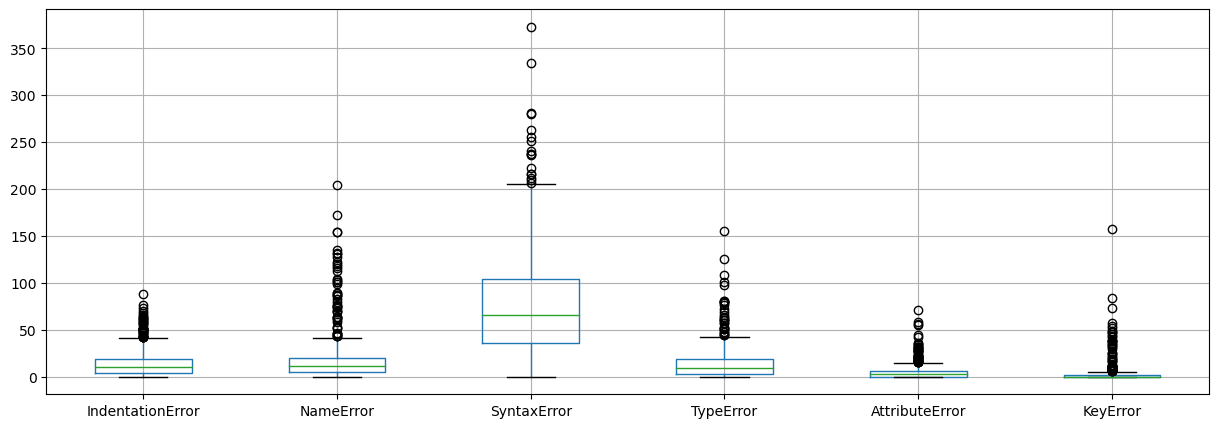

In [39]:
plt.figure(figsize=(15, 5))
viscode_pd[['IndentationError', 'NameError', 'SyntaxError', 'TypeError', 'AttributeError', 'KeyError']].boxplot()

In [40]:
viscode_pd = pd.read_csv('./data/viscode.csv')
#viscode_pd = viscode_pd.drop(['Unnamed: 0', 'class', 'score'], axis =1)
viscode_pd

,userid,code_copy,code_execution,code_paste,code_speed,notebook_open,tree_open,AssertionError,AttributeError,AxisError,...,XLRDError,ZeroDivisionError,codeLength,Viscode-login_times,Viscode-execute_times,Viscode-open_file_times,Viscode-success_run,Viscode-failed_run,Viscode-error_types,Viscode-spent_time
0,01291c313aef72b9786046bd7ce4cfca,584,1398,714,5181,439,70,0.0,8.0,0.0,...,0.0,0.0,4710.0,509,3205,439.0,2950,255.0,10.0,0 days 02:28:28.302167
1,019acd030e0cdf674dda03e2a8ca4369,507,887,670,4827,254,70,0.0,8.0,0.0,...,0.0,0.0,1368.0,324,2388,254.0,2256,132.0,7.0,0 days 01:24:59.160120
2,01ea38c4c3cc5fba869732fc641ca884,176,582,264,1521,73,35,0.0,7.0,0.0,...,0.0,0.0,3543.0,108,1130,73.0,1020,110.0,8.0,0 days 00:50:32.025803
3,023c88ec58c8cf0abcfbcea4166793ad,89,588,137,1563,79,44,0.0,8.0,0.0,...,0.0,0.0,3472.0,123,937,79.0,811,126.0,6.0,0 days 00:54:26.187369
4,02d679ad650962b6ae8bf8adbeeb33c1,69,545,150,1119,41,24,0.0,2.0,0.0,...,0.0,0.0,1228.0,65,829,41.0,701,128.0,7.0,0 days 01:06:30.302228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,fde0bceed4e87f770bbb3e07bec22d05,1102,1275,1421,5092,308,83,0.0,7.0,0.0,...,0.0,0.0,5206.0,391,4189,308.0,4048,141.0,9.0,0 days 02:13:10.995293
500,fe893f4359d6a6a550d109199d5f10f4,106,1044,129,2840,125,50,0.0,29.0,0.0,...,0.0,0.0,3714.0,175,1454,125.0,1090,364.0,11.0,0 days 01:39:59.864313
501,ff352cc412dda02baf83e6c095f81622,394,1270,520,4938,329,118,0.0,2.0,0.0,...,0.0,0.0,3934.0,447,2631,329.0,2399,232.0,9.0,0 days 02:07:27.617555
502,ff6a83db7cd1e89e7f401de25e5edcb7,10,9,20,54,4,2,0.0,0.0,0.0,...,0.0,0.0,194.0,6,45,4.0,43,2.0,1.0,0 days 00:00:25.883548


In [41]:
merge_pd = pd.merge(viscode_pd, score_pd, on='userid', how = 'outer')
merge_pd = merge_pd.drop( 'userid', axis =1)
merge_pd

,code_copy,code_execution,code_paste,code_speed,notebook_open,tree_open,AssertionError,AttributeError,AxisError,ConversionError,...,codeLength,Viscode-login_times,Viscode-execute_times,Viscode-open_file_times,Viscode-success_run,Viscode-failed_run,Viscode-error_types,Viscode-spent_time,score,class
0,584.0,1398.0,714.0,5181.0,439.0,70.0,0.0,8.0,0.0,0.0,...,4710.0,509.0,3205.0,439.0,2950.0,255.0,10.0,0 days 02:28:28.302167,91.0,j
1,507.0,887.0,670.0,4827.0,254.0,70.0,0.0,8.0,0.0,0.0,...,1368.0,324.0,2388.0,254.0,2256.0,132.0,7.0,0 days 01:24:59.160120,70.0,h
2,176.0,582.0,264.0,1521.0,73.0,35.0,0.0,7.0,0.0,0.0,...,3543.0,108.0,1130.0,73.0,1020.0,110.0,8.0,0 days 00:50:32.025803,80.0,a
3,89.0,588.0,137.0,1563.0,79.0,44.0,0.0,8.0,0.0,0.0,...,3472.0,123.0,937.0,79.0,811.0,126.0,6.0,0 days 00:54:26.187369,90.0,a
4,69.0,545.0,150.0,1119.0,41.0,24.0,0.0,2.0,0.0,0.0,...,1228.0,65.0,829.0,41.0,701.0,128.0,7.0,0 days 01:06:30.302228,56.0,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,i
516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,i
517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,i
518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,i


In [42]:
corr = merge_pd.corr()

/tmp/ipykernel_11322/1028273250.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merge_pd.corr()


<Axes: >

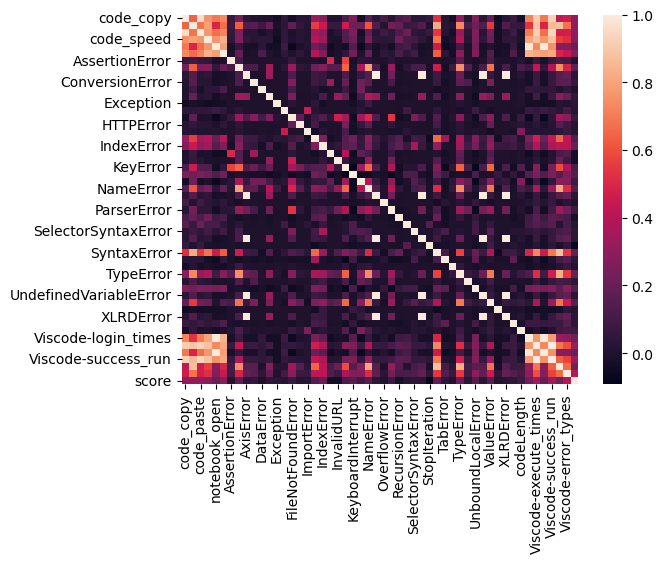

In [43]:
sns.heatmap(corr)

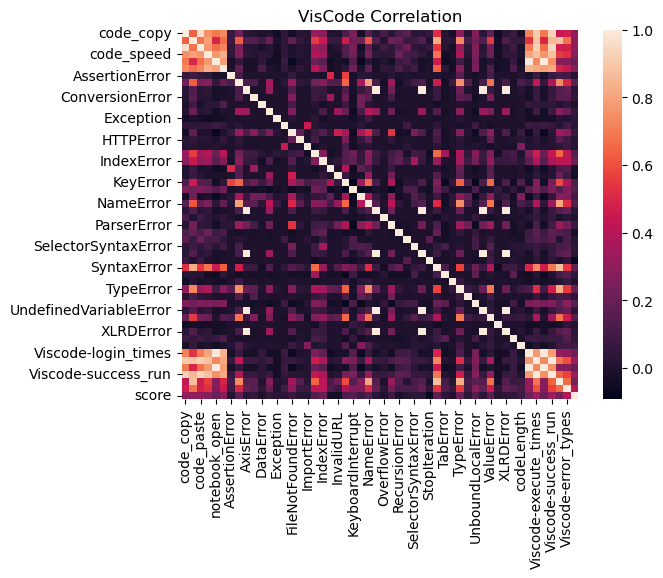

In [44]:
ax = plt.axes()
ax.set_title('VisCode Correlation')

sns_plot = sns.heatmap(corr)

results_path = './data_plot/VisCode_Correlation.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')

## bookroll

In [45]:
br_pd = pd.read_csv('./data/br.csv')

In [47]:
#br_pd = br_pd.drop(['ADD_RECOMMENDATION', 'CLOSE_RECOMMENDATION', 'OPEN_RECOMMENDATION', 'LINK_CLICK', 'REGIST CONTENTS'], axis=1)
#br_pd = br_pd.drop(['ADD_RECOMMENDATION', 'CLOSE_RECOMMENDATION', 'OPEN_RECOMMENDATION', 'LINK_CLICK', 'REGIST CONTENTS'], axis=1)
br_pd = br_pd.drop(['CLOSE_RECOMMENDATION', 'OPEN_RECOMMENDATION', 'LINK_CLICK', 'REGIST CONTENTS'], axis=1)
br_pd

KeyError: "['CLOSE_RECOMMENDATION', 'OPEN_RECOMMENDATION', 'LINK_CLICK', 'REGIST CONTENTS'] not found in axis"

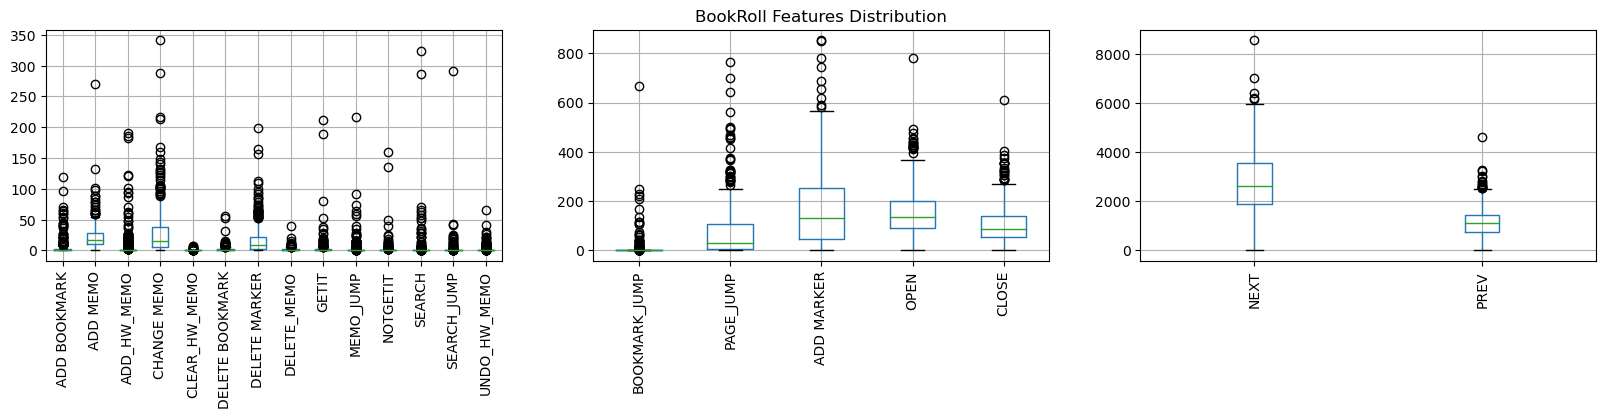

In [48]:
plt.figure(figsize=(20, 3))


plt.subplot(1, 3, 1)
br_pd.drop(['NEXT', 'PREV','ADD MARKER', 'OPEN', 'CLOSE', 'PAGE_JUMP', 'BOOKMARK_JUMP'], axis=1).boxplot() # 
plt.xticks(rotation=90)



plt.subplot(1, 3, 2)
br_pd[['BOOKMARK_JUMP', 'PAGE_JUMP', 'ADD MARKER', 'OPEN', 'CLOSE']].boxplot()
plt.xticks(rotation=90)

plt.title('BookRoll Features Distribution')


plt.subplot(1, 3, 3)
br_pd[['NEXT', 'PREV']].boxplot()
plt.xticks(rotation=90)


results_path = './data_plot/BookRoll_Features_Distribution.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')
plt.show()

In [49]:
br_pd = pd.read_csv('./data/br.csv')
#br_pd = br_pd.drop(['Unnamed: 0', 'class', 'score', 'ADD_RECOMMENDATION', 'REGIST CONTENTS'], axis =1)
br_pd = br_pd.drop([ 'REGIST CONTENTS'], axis =1)
br_pd

,userid,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,...,MEMO_JUMP,NEXT,NOTGETIT,OPEN,OPEN_RECOMMENDATION,PAGE_JUMP,PREV,SEARCH,SEARCH_JUMP,UNDO_HW_MEMO
0,01291c313aef72b9786046bd7ce4cfca,9,144,12,63,64,96,2,80,0,...,0,2724,0,111,0,237,889,0,0,65
1,019acd030e0cdf674dda03e2a8ca4369,1,81,15,0,0,14,0,95,0,...,0,3321,2,159,0,109,1584,0,0,0
2,01ea38c4c3cc5fba869732fc641ca884,7,354,36,1,2,22,1,211,1,...,2,2209,1,256,0,67,750,1,0,2
3,023c88ec58c8cf0abcfbcea4166793ad,1,61,25,0,0,9,0,290,0,...,0,3707,1,325,0,7,1275,0,0,0
4,02d679ad650962b6ae8bf8adbeeb33c1,4,188,28,8,4,25,0,38,0,...,15,1413,0,138,0,40,788,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,fda96a011b9b53ba6aa39fa978140bdc,39,490,44,2,0,144,0,240,1,...,0,3834,1,343,0,20,1518,0,0,2
469,fde0bceed4e87f770bbb3e07bec22d05,0,0,8,0,0,33,0,60,0,...,3,2105,1,126,0,188,514,0,0,0
470,ff352cc412dda02baf83e6c095f81622,0,186,19,16,0,19,6,78,0,...,0,2733,0,159,0,169,1034,0,0,1
471,ff6a83db7cd1e89e7f401de25e5edcb7,1,0,0,0,0,0,0,9,0,...,0,125,0,9,0,0,0,0,0,0


In [50]:
merge_pd = pd.merge(br_pd, score_pd, on='userid', how = 'outer')
merge_pd = merge_pd.drop( 'userid', axis =1)
merge_pd

,ADD BOOKMARK,ADD MARKER,ADD MEMO,ADD_HW_MEMO,BOOKMARK_JUMP,CHANGE MEMO,CLEAR_HW_MEMO,CLOSE,CLOSE_RECOMMENDATION,DELETE BOOKMARK,...,NOTGETIT,OPEN,OPEN_RECOMMENDATION,PAGE_JUMP,PREV,SEARCH,SEARCH_JUMP,UNDO_HW_MEMO,score,class
0,9.0,144.0,12.0,63.0,64.0,96.0,2.0,80.0,0.0,2.0,...,0.0,111.0,0.0,237.0,889.0,0.0,0.0,65.0,91.0,j
1,1.0,81.0,15.0,0.0,0.0,14.0,0.0,95.0,0.0,0.0,...,2.0,159.0,0.0,109.0,1584.0,0.0,0.0,0.0,70.0,h
2,7.0,354.0,36.0,1.0,2.0,22.0,1.0,211.0,1.0,4.0,...,1.0,256.0,0.0,67.0,750.0,1.0,0.0,2.0,80.0,a
3,1.0,61.0,25.0,0.0,0.0,9.0,0.0,290.0,0.0,1.0,...,1.0,325.0,0.0,7.0,1275.0,0.0,0.0,0.0,90.0,a
4,4.0,188.0,28.0,8.0,4.0,25.0,0.0,38.0,0.0,2.0,...,0.0,138.0,0.0,40.0,788.0,0.0,0.0,0.0,56.0,c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,i
524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,i
525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,i
526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,i


/tmp/ipykernel_11322/1665474610.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merge_pd.corr()


<Axes: >

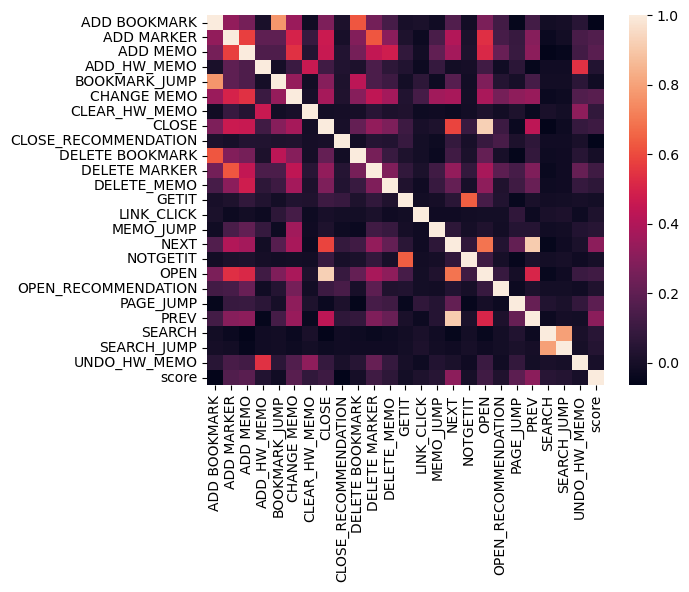

In [51]:
corr = merge_pd.corr()
sns.heatmap(corr)

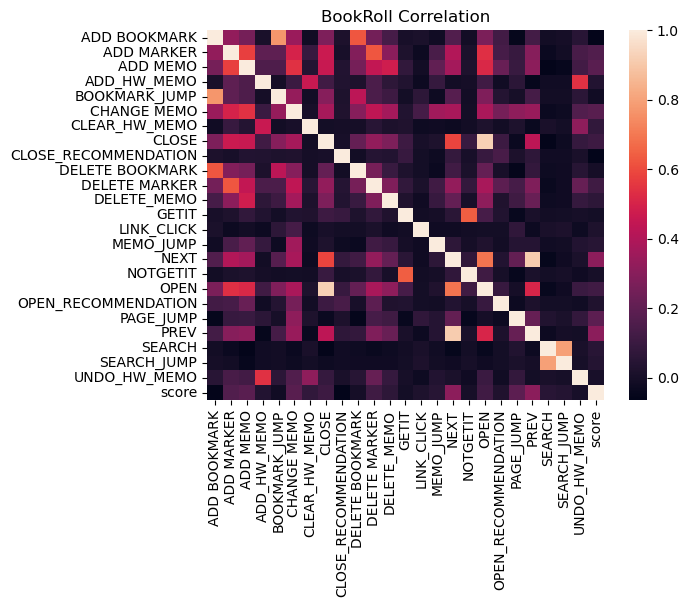

In [52]:
ax = plt.axes()
ax.set_title('BookRoll Correlation')

sns_plot = sns.heatmap(corr)

results_path = './data_plot/BookRoll_Correlation.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')